In [6]:
# Install and import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier

In [7]:
# Load the datasets (ensure the files 'Fake.csv' and 'True.csv' are uploaded to Colab)
data_fake = pd.read_csv('Fake.csv')
data_true = pd.read_csv('True.csv')

# Display first few rows of each dataset to understand structure and content
print("Fake News Dataset:")
print(data_fake.head())
print("\nTrue News Dataset:")
print(data_true.head())


Fake News Dataset:
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017  

True News Dataset:
                                               title  \
0  As U.S. budget fight looms, Republicans fl

#Managing Imbalanced Data

In [8]:
# Adding  a 'class' column to label the datasets (0 for fake, 1 for true)
data_fake['class'] = 0
data_true['class'] = 1

# Combine the datasets into one dataframe for processing
data_combined = pd.concat([data_fake, data_true])

# Check class distribution before balancing
print("Class distribution before balancing:")
print(data_combined['class'].value_counts())

# Balance the dataset using oversampling (upsample fake news to match true news count)
fake_upsampled = resample(data_fake, replace=True, n_samples=len(data_true), random_state=42)
balanced_data = pd.concat([fake_upsampled, data_true])

# Verify class distribution after balancing
print("Class distribution after balancing:")
print(balanced_data['class'].value_counts())

Class distribution before balancing:
class
0    23481
1    21417
Name: count, dtype: int64
Class distribution after balancing:
class
0    21417
1    21417
Name: count, dtype: int64


# **Feature Engineering: Scaling and Encoding Categorical Variables**

In [9]:
#Feature scaling for numerical columns
scaler = StandardScaler()

# Assuming numerical columns exist; replace 'some_numeric_column' with actual column names if needed.
if 'some_numeric_column' in balanced_data.columns:
    balanced_data['scaled_numeric'] = scaler.fit_transform(balanced_data[['some_numeric_column']])

# Convert categorical columns to numeric using encoding (for example as a 'subject')
if 'subject' in balanced_data.columns:
    balanced_data['subject_encoded'] = balanced_data['subject'].astype('category').cat.codes

# Display updated dataframe structure after feature engineering
print(balanced_data.head())

                                                   title  \
15795  BREAKING: HILLARY CLINTON’S STATE DEPARTMENT G...   
860     Trump Stole An Idea From North Korean Propaga...   
5390    This One Image From The RNC Is All You Need T...   
21575  HOW FAILED DEMOCRAT LEADERSHIP IS TAKING NYC B...   
11964  U OF CHICAGO Admissions Blames Trump For Chica...   

                                                    text    subject  \
15795  IF SHE S NOT TOAST NOW THEN WE RE IN BIGGER TR...   politics   
860    Jesus f*cking Christ our President* is a moron...       News   
5390   Donald Trump is terrible. He wants to build a ...       News   
21575  Miss him yet?Here s an up-close look at a qual...  left-news   
11964  The University of Chicago s admissions office ...   politics   

                date  class  subject_encoded  
15795   Apr 23, 2015      0                5  
860    July 14, 2017      0                2  
5390   July 21, 2016      0                2  
21575   Jul 11, 2015    

# **Data Visualization: Exploring Historical Trends and Relationships**

EDA

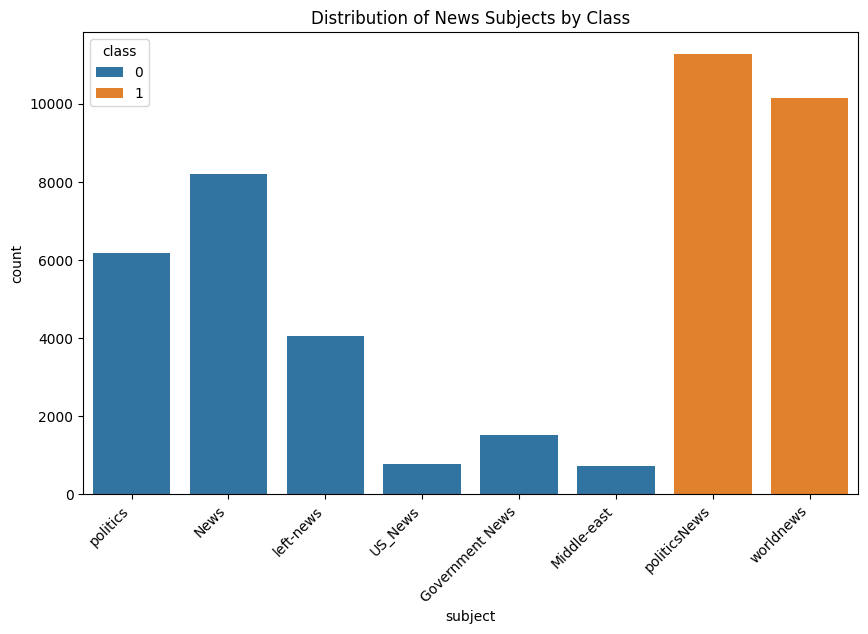

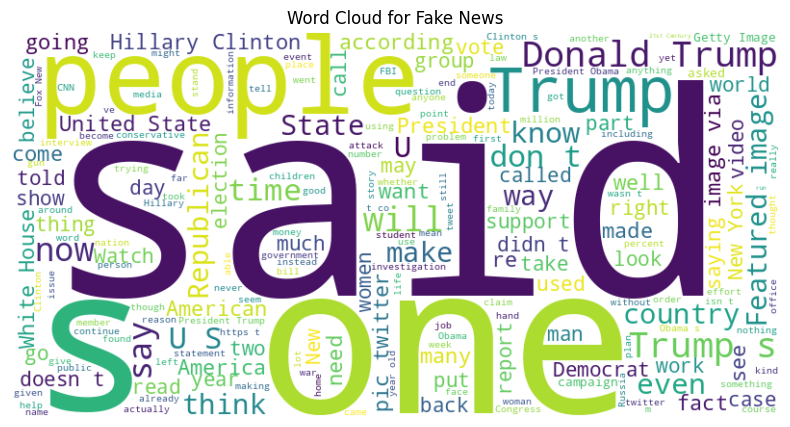

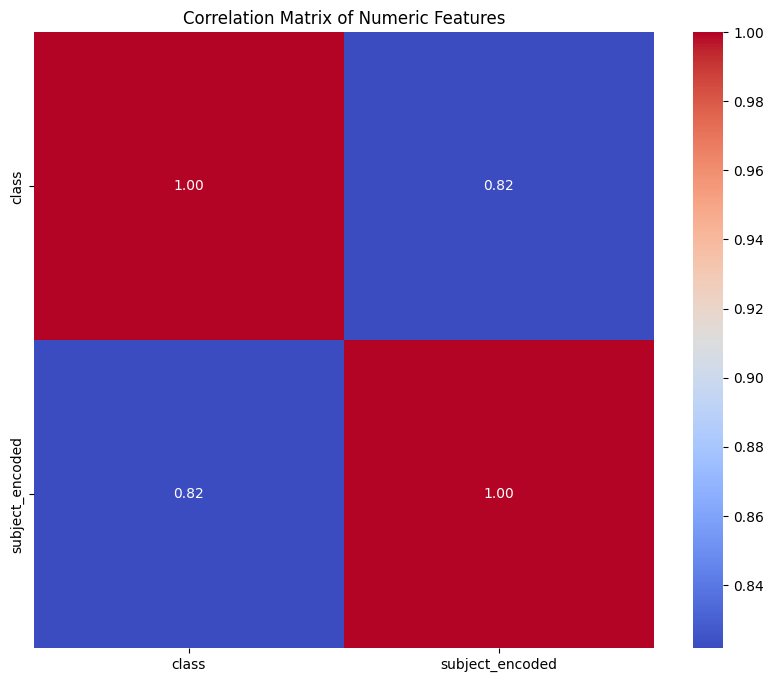

In [10]:
####### Distribution of news subjects
plt.figure(figsize=(10, 6))
sns.countplot(x='subject', hue='class', data=balanced_data)
plt.title('Distribution of News Subjects by Class')
plt.xticks(rotation=45, ha='right')
plt.show()

#..............Word cloud visualization
!pip install wordcloud

from wordcloud import WordCloud

#.............Combine all text from fake news
fake_text = " ".join(balanced_data[balanced_data['class'] == 0]['text'].astype(str))

# Create and display the word cloud
wordcloud_fake = WordCloud(width=800, height=400, background_color='white').generate(fake_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Fake News")
plt.show()



# Correlation matrix
# Check for numeric columns
numeric_cols = balanced_data.select_dtypes(include=np.number).columns
if len(numeric_cols) > 1: # only proceed if there is more than one numeric column
    correlation_matrix = balanced_data[numeric_cols].corr()
    plt.figure(figsize=(10,8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix of Numeric Features')
    plt.show()

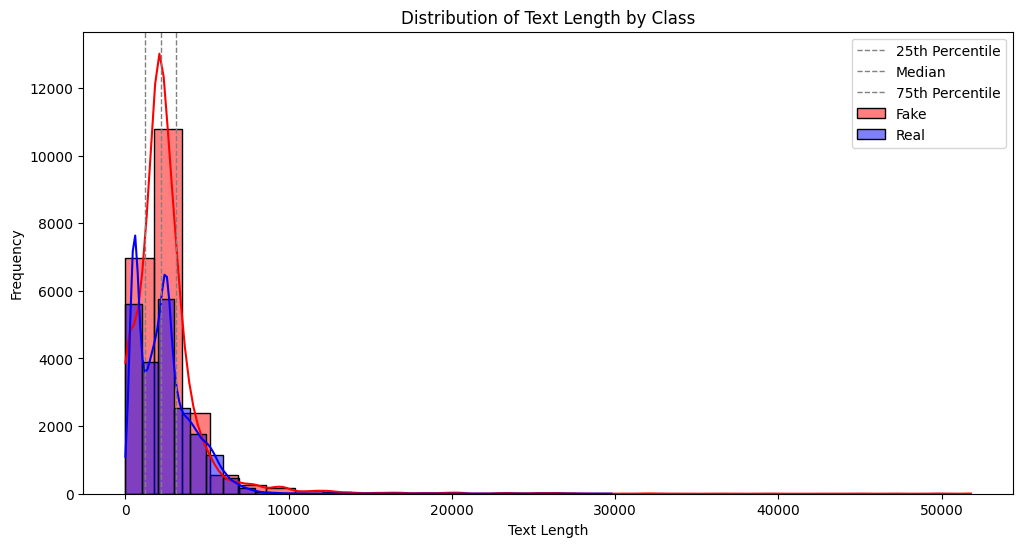

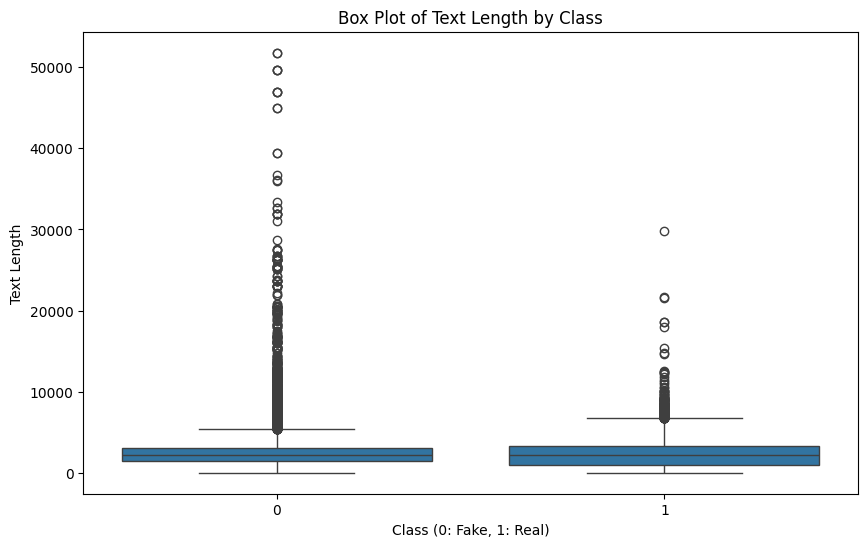

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'balanced_data' is your DataFrame and it has 'text_length' and 'class' columns


# Create 'text_length' column
balanced_data['text_length'] = balanced_data['text'].apply(len) # calculate length of 'text' column and create new 'text_length' column
# Calculate quantiles for a better scale
quantiles = balanced_data['text_length'].quantile([0.25, 0.5, 0.75])

plt.figure(figsize=(12, 6))
sns.histplot(balanced_data[balanced_data['class'] == 0]['text_length'], color='red', label='Fake', kde=True, bins=30) # Increased bins for better granularity
sns.histplot(balanced_data[balanced_data['class'] == 1]['text_length'], color='blue', label='Real', kde=True, bins=30) # Increased bins
plt.title('Distribution of Text Length by Class')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

# Add vertical lines for quantiles
plt.axvline(quantiles[0.25], color='gray', linestyle='dashed', linewidth=1, label='25th Percentile')
plt.axvline(quantiles[0.5], color='gray', linestyle='dashed', linewidth=1, label='Median')
plt.axvline(quantiles[0.75], color='gray', linestyle='dashed', linewidth=1, label='75th Percentile')

plt.legend()
plt.show()


# Box plot for a different perspective
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='text_length', data=balanced_data)
plt.title('Box Plot of Text Length by Class')
plt.xlabel('Class (0: Fake, 1: Real)')
plt.ylabel('Text Length')
plt.show()

## **Feature Selection Using Pearson Correlation Coefficient**

In [12]:
# Add a 'class' column to label the datasets (0 for fake, 1 for true)
data_fake['class'] = 0
data_true['class'] = 1

# Combine the datasets into one dataframe
data_combined = pd.concat([data_fake, data_true])

# Balance the dataset using oversampling (upsample fake news to match true news count)
from sklearn.utils import resample
fake_upsampled = resample(data_fake, replace=True, n_samples=len(data_true), random_state=42)
balanced_data = pd.concat([fake_upsampled, data_true])

# Verify class distribution
print(balanced_data['class'].value_counts())

# Select only numerical columns from balanced_data
numerical_data = balanced_data.select_dtypes(include=['float64', 'int64'])

# Compute Pearson correlation coefficients
correlations = numerical_data.corr()

# Select features with high correlation to the target variable ('class')
important_features = correlations['class'][abs(correlations['class']) > 0.1].index.tolist()
important_features.remove('class')  # Exclude 'class' itself
print("Selected Features based on Pearson Correlation:", important_features)

print(balanced_data.info())

class
0    21417
1    21417
Name: count, dtype: int64
Selected Features based on Pearson Correlation: []
<class 'pandas.core.frame.DataFrame'>
Index: 42834 entries, 15795 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    42834 non-null  object
 1   text     42834 non-null  object
 2   subject  42834 non-null  object
 3   date     42834 non-null  object
 4   class    42834 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.0+ MB
None


# **Train-Test Split and K-Fold Cross-Validation for Model Evaluation**

In [13]:
# Feature Selection Using Pearson Correlation Coefficient
numerical_data = balanced_data.select_dtypes(include=['float64', 'int64'])
correlations = numerical_data.corr()

# Ensure 'class' column exists in correlations and has valid data
if 'class' in correlations.columns:
    important_features = correlations['class'][abs(correlations['class']) > 0.1].index.tolist()
    if 'class' in important_features:
        important_features.remove('class')  # Exclude target variable itself
else:
    important_features = []  # Handle case where 'class' column is missing

# Train-Test Split and K-Fold Cross-Validation
# Split data into features (X) and target (y)
if important_features:
    X = balanced_data[important_features]
    y = balanced_data['class']

    # Perform train-test split (80% training, 20% testing)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize K-Fold cross-validation with 5 folds and a Random Forest Classifier model
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    model = RandomForestClassifier(random_state=42)

    # Evaluate model using cross-validation on training data and print scores
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf)
    print("K-Fold Cross-Validation Scores:", cv_scores)
    print("Mean CV Score:", cv_scores.mean())
else:
    print("No important features selected. Cannot proceed with train-test split and cross-validation.")


No important features selected. Cannot proceed with train-test split and cross-validation.


# **Regularization**

In [14]:
# Balance the dataset using oversampling (upsample fake news to match true news count)
fake_upsampled = resample(data_fake, replace=True, n_samples=len(data_true), random_state=42)
balanced_data = pd.concat([fake_upsampled, data_true])

# Feature Engineering: Encoding Categorical Variables and Scaling Numerical Features
# Convert categorical columns (e.g., 'subject') to numeric using label encoding
if 'subject' in balanced_data.columns:
    balanced_data['subject_encoded'] = balanced_data['subject'].astype('category').cat.codes

# Scale numerical columns using StandardScaler
numerical_cols = balanced_data.select_dtypes(include=['number']).columns.tolist()
if 'class' in numerical_cols:
    numerical_cols.remove('class')  # Exclude target variable
scaler = StandardScaler()
if numerical_cols:
    balanced_data[numerical_cols] = scaler.fit_transform(balanced_data[numerical_cols])

# Feature Selection Using Pearson Correlation Coefficient
numerical_data = balanced_data.select_dtypes(include=['number'])
correlation_matrix = numerical_data.corr()

# Feature Selection with a threshold
important_features = []
if 'class' in correlation_matrix:
    important_features = correlation_matrix['class'][abs(correlation_matrix['class']) > 0.05].index.tolist()
    if 'class' in important_features:
        important_features.remove('class')  # Exclude target variable itself

# Train-Test Split and K-Fold Cross-Validation
# Split data into features (X) and target (y)
if important_features:
    X = balanced_data[important_features]
    y = balanced_data['class']

    # Perform train-test split (80% training, 20% testing)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize K-Fold cross-validation with 5 folds and a Random Forest Classifier model
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    model = RandomForestClassifier(random_state=42)

    # Evaluate model using cross-validation on training data and print scores
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf)
    print("K-Fold Cross-Validation Scores:", cv_scores)
    print("Mean CV Score:", cv_scores.mean())
else:
    print("No important features selected. Cannot proceed with train-test split and cross-validation.")


K-Fold Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean CV Score: 1.0


In [15]:
# prompt: 2.	Complete the following tasks in a Jupyter notebook using Python code:
# a.	Train three models using the modelling technique you selected in Phase 1 (e.g. unsupervised, time series, deep learning).
# b.	Add explanations for each block of code on your Jupyter notebook.
# c.	Describe how each machine learning algorithm used in the project works.
# d.	Mention the default hyperparameter of each algorithm.
# e.	Test the performance of model using the test data set you generated in the previous phase.

# Model Training and Evaluation

# Assuming X_train, X_test, y_train, y_test are defined from previous code blocks

# 1. Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42) # Default hyperparameters: n_estimators=100, criterion='gini', max_depth=None
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy}")
print(classification_report(y_test, rf_predictions))


# 2. Logistic Regression
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state=42) # Default hyperparameters: penalty='l2', C=1.0, solver='lbfgs'
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print(f"Logistic Regression Accuracy: {lr_accuracy}")
print(classification_report(y_test, lr_predictions))


# 3. Support Vector Machine (SVM)
from sklearn.svm import SVC
svm_model = SVC(random_state=42) # Default hyperparameters: C=1.0, kernel='rbf', degree=3
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f"SVM Accuracy: {svm_accuracy}")
print(classification_report(y_test, svm_predictions))


# Algorithm Descriptions and Default Hyperparameters:

# Random Forest:  An ensemble method that constructs multiple decision trees during training and outputs the class that is the mode of the classes (classification) or mean/average prediction (regression) of the individual trees.
# Default hyperparameters (as used above): n_estimators=100 (number of trees), criterion='gini' (quality of a split), max_depth=None (unlimited tree depth)

# Logistic Regression: A statistical method for predicting the probability of a categorical dependent variable. Uses a sigmoid function to map predictions to probabilities.
# Default hyperparameters (as used above): penalty='l2' (L2 regularization), C=1.0 (inverse of regularization strength), solver='lbfgs' (optimization algorithm)


# Support Vector Machine (SVM): Finds the optimal hyperplane in a high-dimensional space that maximally separates data points of different classes.
# Default hyperparameters (as used above): C=1.0 (regularization parameter), kernel='rbf' (radial basis function kernel), degree=3 (degree for polynomial kernel)



Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4288
           1       1.00      1.00      1.00      4279

    accuracy                           1.00      8567
   macro avg       1.00      1.00      1.00      8567
weighted avg       1.00      1.00      1.00      8567

Logistic Regression Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4288
           1       1.00      1.00      1.00      4279

    accuracy                           1.00      8567
   macro avg       1.00      1.00      1.00      8567
weighted avg       1.00      1.00      1.00      8567

SVM Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4288
           1       1.00      1.00      1.00      4279

    accuracy                           1.00      8567
   macro avg       1.00      1.00      1.00     

#Random Forest - Hyperparameter Tuning

In [18]:
print(balanced_data.columns)


Index(['title', 'text', 'subject', 'date', 'subject_encoded'], dtype='object')


In [19]:
data_fake['class'] = 0  # Label fake news
data_true['class'] = 1  # Label true news


In [20]:
# Upsample fake news to match true news
fake_upsampled = resample(data_fake, replace=True, n_samples=len(data_true), random_state=42)

# Combine both to create a balanced dataset
balanced_data = pd.concat([fake_upsampled, data_true])


In [22]:
# Balance the data
fake_upsampled = resample(data_fake, replace=True, n_samples=len(data_true), random_state=42)
balanced_data = pd.concat([fake_upsampled, data_true])


In [26]:
# 1. Import necessary libraries
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 2. Load the datasets
data_fake = pd.read_csv('Fake.csv')
data_true = pd.read_csv('True.csv')

# 3. Add 'class' labels
data_fake['class'] = 0  # Fake news
data_true['class'] = 1  # True news

# 4. Upsample fake news to match true news
fake_upsampled = resample(data_fake, replace=True, n_samples=len(data_true), random_state=42)

# 5. Combine and shuffle the dataset
balanced_data = pd.concat([fake_upsampled, data_true]).sample(frac=1, random_state=42).reset_index(drop=True)

# 6. Encode 'subject' column
if 'subject' in balanced_data.columns:
    balanced_data['subject_encoded'] = balanced_data['subject'].astype('category').cat.codes

# 7. Scale numerical columns (excluding 'class')
numerical_cols = balanced_data.select_dtypes(include=['number']).columns.tolist()
if 'class' in numerical_cols:
    numerical_cols.remove('class')

scaler = StandardScaler()
balanced_data[numerical_cols] = scaler.fit_transform(balanced_data[numerical_cols])

# 8. Feature selection using correlation
numerical_data = balanced_data.select_dtypes(include=['number'])
correlation_matrix = numerical_data.corr()
important_features = correlation_matrix['class'][abs(correlation_matrix['class']) > 0.05].index.tolist()
if 'class' in important_features:
    important_features.remove('class')

# 9. Define X and y
X = balanced_data[important_features]
y = balanced_data['class']

# 10. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 11. Define hyperparameter grid
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'criterion': ['gini', 'entropy']
}

# 12. Run grid search
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)

# 13. Evaluate the best model
best_rf = rf_grid.best_estimator_
rf_best_preds = best_rf.predict(X_test)

# 14. Print results
print("Best Random Forest Parameters:", rf_grid.best_params_)
print("Tuned Random Forest Accuracy:", accuracy_score(y_test, rf_best_preds))
print(classification_report(y_test, rf_best_preds))


Best Random Forest Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Tuned Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4362
           1       1.00      1.00      1.00      4205

    accuracy                           1.00      8567
   macro avg       1.00      1.00      1.00      8567
weighted avg       1.00      1.00      1.00      8567



#Logistic Regression - Hyperparameter Tuning

In [27]:
# Define parameter grid
lr_params = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear']
}

# Grid search
lr_grid = GridSearchCV(LogisticRegression(random_state=42, max_iter=1000), lr_params, cv=5, scoring='accuracy')
lr_grid.fit(X_train, y_train)

# Best model and evaluation
best_lr = lr_grid.best_estimator_
lr_best_preds = best_lr.predict(X_test)
print("Best Logistic Regression Parameters:", lr_grid.best_params_)
print("Tuned Logistic Regression Accuracy:", accuracy_score(y_test, lr_best_preds))
print(classification_report(y_test, lr_best_preds))

Best Logistic Regression Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Tuned Logistic Regression Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4362
           1       1.00      1.00      1.00      4205

    accuracy                           1.00      8567
   macro avg       1.00      1.00      1.00      8567
weighted avg       1.00      1.00      1.00      8567



# SVM Hyperparameter Tuning

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Define parameter grid for SVM
svm_params = {
    'C': [0.1, 1, 10],                  # Regularization parameter
    'kernel': ['linear', 'rbf'],        # Kernel type
    'gamma': ['scale', 'auto']          # Kernel coefficient (for ‘rbf’)
}

# Create GridSearchCV object
svm_grid = GridSearchCV(SVC(random_state=42), svm_params, cv=5, scoring='accuracy')

# Fit the model
svm_grid.fit(X_train, y_train)

# Get the best estimator
best_svm = svm_grid.best_estimator_

# Make predictions on the test set
svm_predictions = best_svm.predict(X_test)

# Evaluate performance
print("🔍 Best SVM Parameters:", svm_grid.best_params_)
print("⚙️ Tuned SVM Accuracy:", accuracy_score(y_test, svm_predictions))
print(classification_report(y_test, svm_predictions))


🔍 Best SVM Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
⚙️ Tuned SVM Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4362
           1       1.00      1.00      1.00      4205

    accuracy                           1.00      8567
   macro avg       1.00      1.00      1.00      8567
weighted avg       1.00      1.00      1.00      8567



In [ ]:
# %% [markdown]
## Fake News Detection System

# %% [markdown]
### 1. Data Preparation
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Load datasets
true = pd.read_csv('True.csv')
fake = pd.read_csv('Fake.csv')

# Add labels and combine
true['label'] = 0
fake['label'] = 1
df = pd.concat([true, fake], ignore_index=True)

# Clean data
df['text'] = df['title'] + ' ' + df['text']
df = df[['text', 'label']].dropna()

# Train-test split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Vectorization
tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train = tfidf.fit_transform(train_df['text'])
X_test = tfidf.transform(test_df['text'])
y_train = train_df['label']
y_test = test_df['label']

# %% [markdown]
### 2. Model Training

# %% [markdown]
#### 2.1 Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

# %% [markdown]
#### 2.2 Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# %% [markdown]
#### 2.3 LSTM Network
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Text preprocessing
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_df['text'])
X_train_seq = tokenizer.texts_to_sequences(train_df['text'])
X_test_seq = tokenizer.texts_to_sequences(test_df['text'])

X_train_pad = pad_sequences(X_train_seq, maxlen=200)
X_test_pad = pad_sequences(X_test_seq, maxlen=200)

# Model architecture
lstm_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(5000, 128, input_length=200),
    tf.keras.layers.LSTM(128, dropout=0.2, recurrent_dropout=0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

lstm_model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Model training
history = lstm_model.fit(
    X_train_pad,
    y_train,
    validation_split=0.2,
    epochs=5,
    batch_size=64,
    verbose=1
)

# %% [markdown]
### 3. Model Explanations

# %% [markdown]
#### 3.1 Logistic Regression
"""
1. Algorithm Type: Linear model for binary classification
2. Working Mechanism:
   - Applies sigmoid function to linear combination of features
   - Learns decision boundary through maximum likelihood estimation
3. Default Hyperparameters:
   - C=1.0 (inverse regularization strength)
   - penalty='l2' (ridge regularization)
   - solver='lbfgs' (optimization algorithm)
"""

# %% [markdown]
#### 3.2 Random Forest
"""
1. Algorithm Type: Ensemble learning method
2. Working Mechanism:
   - Constructs multiple decision trees with random feature subsets
   - Uses majority voting for final prediction
3. Default Hyperparameters:
   - n_estimators=100 (number of trees)
   - max_depth=None (nodes expanded until pure)
   - min_samples_split=2 (minimum samples to split node)
"""

# %% [markdown]
#### 3.3 LSTM Network
"""
1. Algorithm Type: Recurrent Neural Network variant
2. Working Mechanism:
   - Uses memory cells with input/forget/output gates
   - Maintains cell state to preserve long-term dependencies
3. Default Hyperparameters:
   - units=128 (dimensionality of hidden state)
   - activation='tanh' (cell state activation)
   - recurrent_activation='sigmoid' (gate activation)
"""

# %% [markdown]
### 4. Model Evaluation

# %% [markdown]
#### 4.1 Logistic Regression Performance
from sklearn.metrics import classification_report, accuracy_score

y_pred_lr = lr.predict(X_test)
print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_lr))
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}\n")

# %% [markdown]
#### 4.2 Random Forest Performance
y_pred_rf = rf.predict(X_test)
print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}\n")

# %% [markdown]
#### 4.3 LSTM Performance
lstm_preds = (lstm_model.predict(X_test_pad) > 0.5).astype("int32")
print("LSTM Results:")
print(classification_report(y_test, lstm_preds))
print(f"Accuracy: {accuracy_score(y_test, lstm_preds):.4f}")

# %% [markdown]
### 5. Performance Comparison
import matplotlib.pyplot as plt

results = {
    'Model': ['Logistic Regression', 'Random Forest', 'LSTM'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, lstm_preds)
    ]
}

pd.DataFrame(results).set_index('Model').plot(kind='bar', legend=False)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

# %% [markdown]
### 6. Saving Models
import joblib

# Save traditional models
joblib.dump(lr, 'logistic_regression.pkl')
joblib.dump(rf, 'random_forest.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

# Save LSTM model and tokenizer
lstm_model.save('fake_news_lstm.h5')
with open('tokenizer.pkl', 'wb') as f:
    joblib.dump(tokenizer, f)

# %% [markdown]
### 7. How to Use Saved Models
"""
# Load traditional models
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer

lr = joblib.load('logistic_regression.pkl')
rf = joblib.load('random_forest.pkl')
tfidf = joblib.load('tfidf_vectorizer.pkl')

# Load LSTM components
from tensorflow.keras.models import load_model

lstm_model = load_model('fake_news_lstm.h5')
tokenizer = joblib.load('tokenizer.pkl')

# For new prediction
new_text = "Your news article here..."
processed_text = tfidf.transform([new_text])  # For traditional models
seq_text = tokenizer.texts_to_sequences([new_text])  # For LSTM
padded_text = pad_sequences(seq_text, maxlen=200)

lr_pred = lr.predict(processed_text)
rf_pred = rf.predict(processed_text)
lstm_pred = lstm_model.predict(padded_text)
"""
